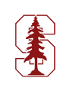

In [16]:
from IPython.display import Image
su = Image(filename='images/SU.png')
display(su)

<h2>FAC Advanced Training</h2>

<h3>Topics</h3>

- Scheduling Deep Dive Niagara Programming
    - Air Handlers - Deep Dive GFX / Niagara Wiresheet Programming <font color=red>(DeltaV)</font>
    - Exhaust Fans - Deep Dive GFX / Niagara Wiresheet Programming <font color=red>(DeltaV)</font>
    - Chilled Water Systems - Deep Dive GFX / Niagara Wiresheet Programming <font color=red>(DeltaV)</font>
    - Hot Water System -Deep Dive GFX / Niagara Wiresheet Programming <font color=red>(DeltaV)</font>
    - Zone - Deep Dive GFX / Niagara Wiresheet Programming <font color=Blue>(Therma)</font>
    - Sequence of Operations - Deep Dive <font color=Blue>(Therma)</font>
    - Deep Dive Troubleshooting <font color=Blue>(Therma)</font>
    - Niagara Analytics capabilities <font color=Blue>(Therma)</font>

<h2>Zone - Deep Dive GFX / Niagara Wiresheet Programming</h2> 

### EC-gFX Program
<h3>IEC 61131</h3> </n>
<p>EC-gFX loosely follows the IEC-61131 <strong>FBD (functional block diagram)</strong> style of programming logic (as does niagara wiresheet programming)</p>
<p>All zone level programming is accomplished via gFX (except for a very small handful of zones, one of which is in the basement).  In general the programmatic logic is derived from the provided <strong>Sequence of Operations</strong> in the specifications documentation.</p></n>
<p>In the case of Wallenberg Hall (01B160) the <strong>Zone Level</strong> code that was used is a <em>grand-fathered</em> "standard" that has been modified to perform to the specifications documented in the bid documents.  In general the code base performs <code>Dual Max functionality with Discharge air temperature control</code> this is performed in <strong>two</strong> stages (dual-max).  During the first stage the program will attempt to first increase <strong>discharge air temperature</strong> by opening the <code>reheat valve</code> open.  If the zone temperature does not satisfy the second of the two stages will drive the <code>airflow</code> towards the <code>HeatingAirFlowMax Setpoint</code>.  This is of course the very abridged version of the dual-max specification but this is the general concept.</p>
<p>EC-gFX facilitates the implementation of the CEA-709 Lonworks communication protocol by enabling the programmer to define common <code>network variable inputs (nvi)</code> and <code>network variable outputs (nvo)</code>, the data types associated with each of the variables that are defined by the user can be set by issuing the <em>change type</em> command via the command pallet.  The nvi/nvo types are assigned by defining either UNVT, SNVT or NCI data type.  UNVTs are typically classified as <code>struct</code> data types and vary in length and size and can contain many different data types within the structure.  UNVT stands for <strong>User Network Variable Type</strong>.  Outside of the UNVTs that are pre-loaded into the gFX program there aren't many options for defining custom UNVTs (<i>which I'm sure we can all agree would be very useful when tasked with creating bindings in 100+ LON devices!</i>).  SNVTs definitions are likely the most used and easiest to apply.  To date I have not seen NCIs used as much as nvi/nvo in the gFX programming environment.  This may have something to do with the Distech implementation of the nci data type definition.  Strange things happen on a LON network with it doesn't know the data type to associate with a variable.  The correct areas to use NCIs over NVI/NVO is in parameters that change infrequently (eg; CoolingSetpointOffset, this value typically remains the same once the criticality of the zone is determined.)</p>


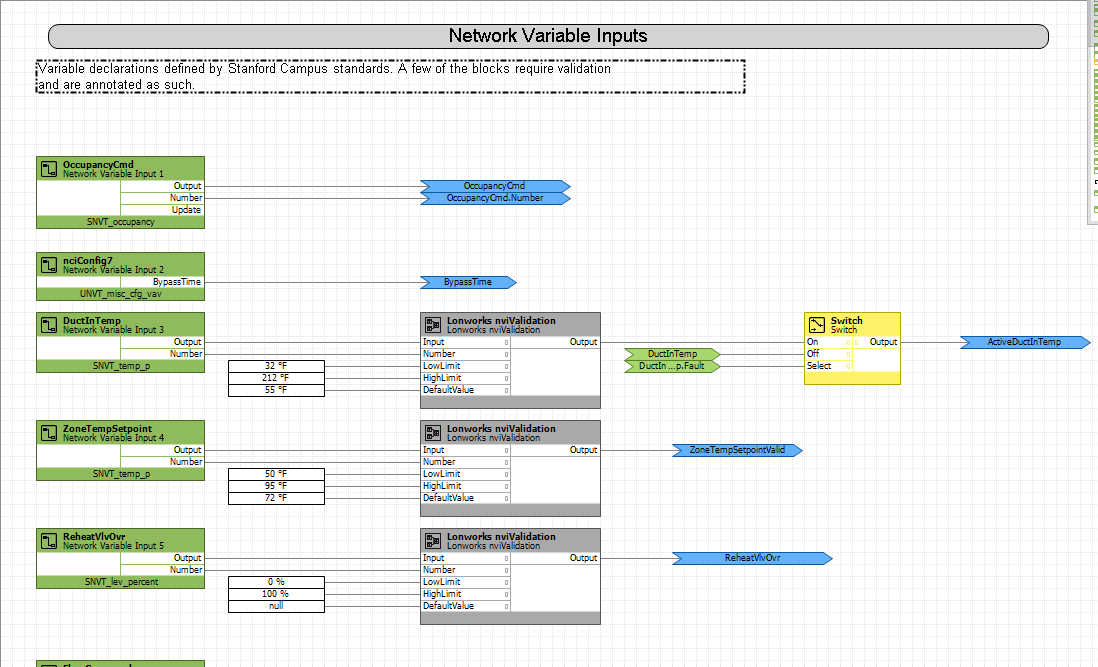

In [17]:
nvi = Image(filename='images/nvi.PNG')
display(nvi)

### Network Variable Inputs (Tab)
<p>The code within gFX is organized hierarchically by:</p>

- Organization
    - Tabs
    - Encapsulated code segments
    - Less used would be ToolBox objects
    
<p>In the example above there is a combination of both <code>Tabs</code> and <code>ToolBox</code> code segments.  Tool-Box code segments are (in general) encapsulated code segments that are compiled into objects that cannot be altered or viewed.  The objects used in the example are for nvi validation within the code.</p>

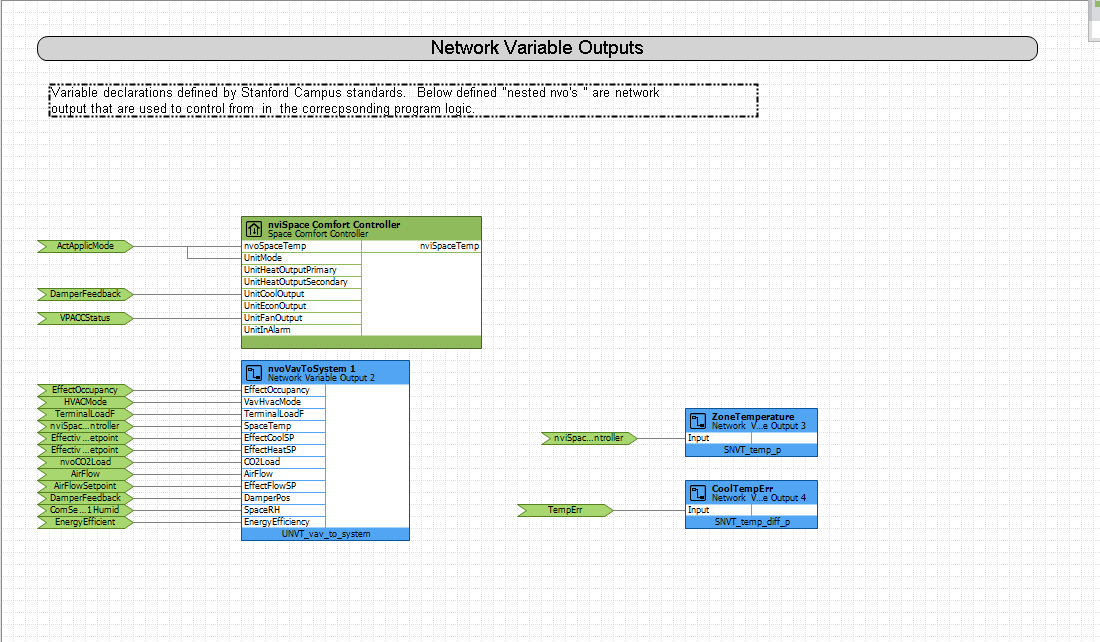

In [18]:
nvo = Image(filename='images/nvo.PNG')
display(nvo)

### Network Variable Inputs (Tab)
<p>Both of the objects shown in the code snippet above are legacy objects from the <strong>grand-fathered</strong> code base.  In the future these objects will (hopefully) not be used by <strong>Therma</strong> as they do not meet Stanford Object naming standards and create overhead that is unneeded.</p>

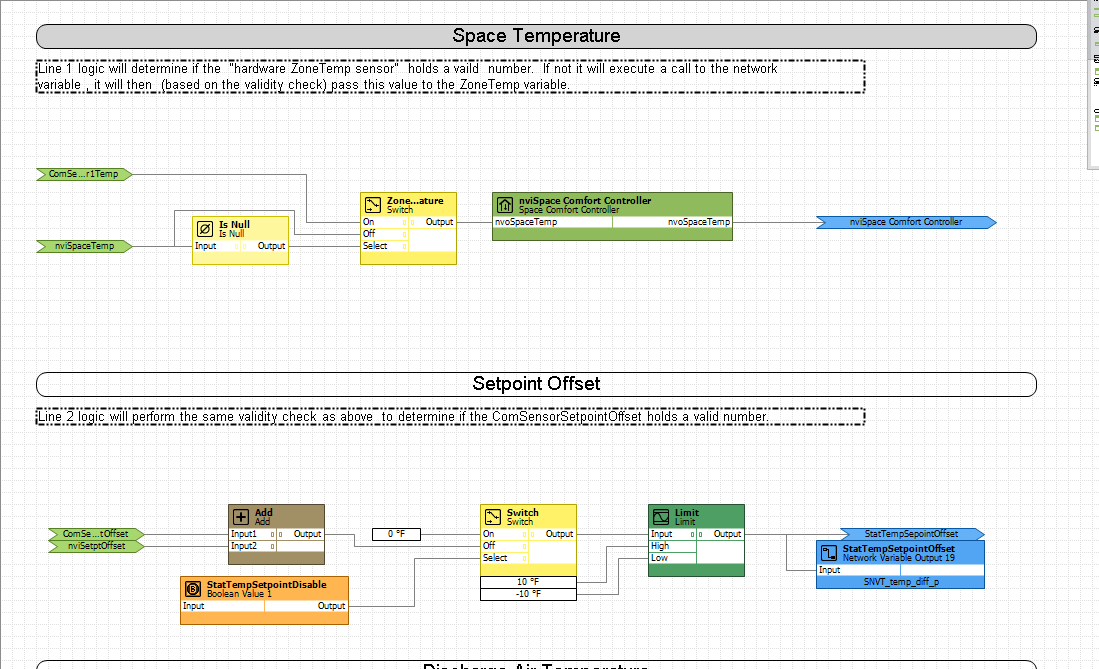

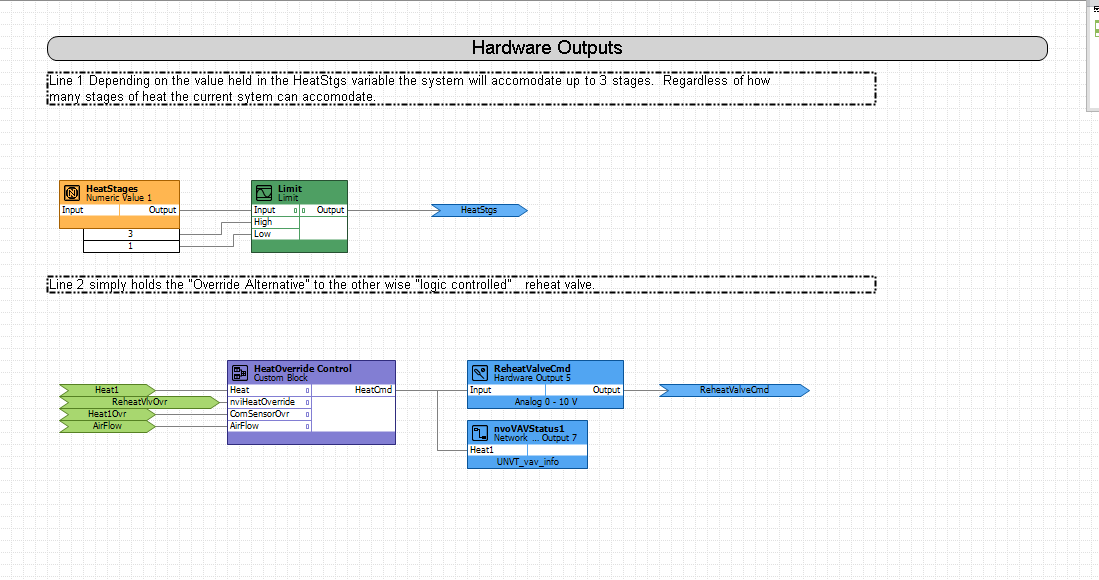

In [19]:
hwi = Image(filename='images/hwi.PNG')
hwo = Image(filename='images/hwo.PNG')
display(hwi,hwo)

### Hardware Inputs & Hardware Outputs
<p>These tabs should both be self explanatory.  But if there are any questions please feel to ask and I'll do my best to explain.</p>

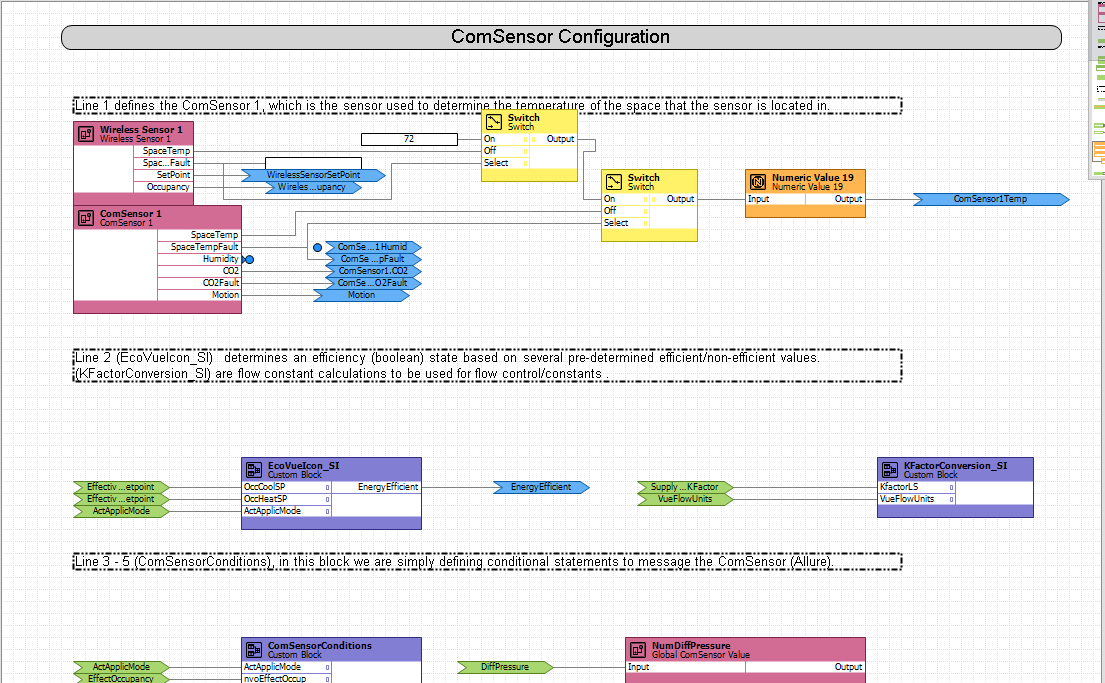

In [20]:
coms = Image(filename='images/comsensor.PNG')
display(coms)

### ComSensor (Tab)
<p>Many of the objects shown in the code snippet above are legacy objects from the <strong>grand-fathered</strong> code base.  In the future these objects will (hopefully) not be used by <strong>Therma</strong> as they do not meet Stanford Object naming standards and create overhead that is unneeded.  In short, the EC-View Thermostat has many parameters that can be configured and those parameters are accomplished here.  As well, there was a bit of logic added in order to accommodate areas that might have to make use of a <code>Wireless Thermostat</code>.  <i>Please excuse this little bit of logic as I was only tasked with fixing it and not with writing it.</i></p>

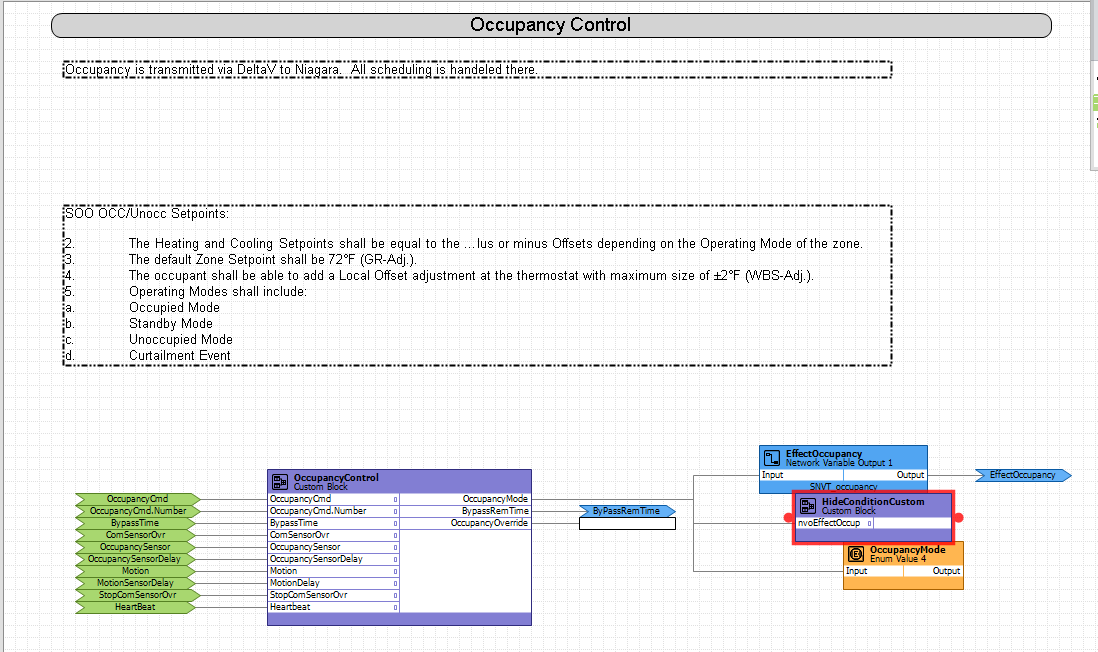

In [21]:
occ = Image(filename='images/occ_sp.PNG')
display(occ)

### Occupancy & Space Temperature (Tab)
<p>Effective occupancy and effective temperature setpoints are determined here.  There are <code>Heating SP Offset, Cooling SP Offset for all of the occupied and standby modes of operation.  The Unoccupied setpoints for this code base are absolute.</code> The code here will also take into account the bypass mode of operation (which is effectively a temporary occupancy period of 120 minutes).  If there are questions regarding the code here please feel free to ask any questions and I'll do my best to cover them.</p>

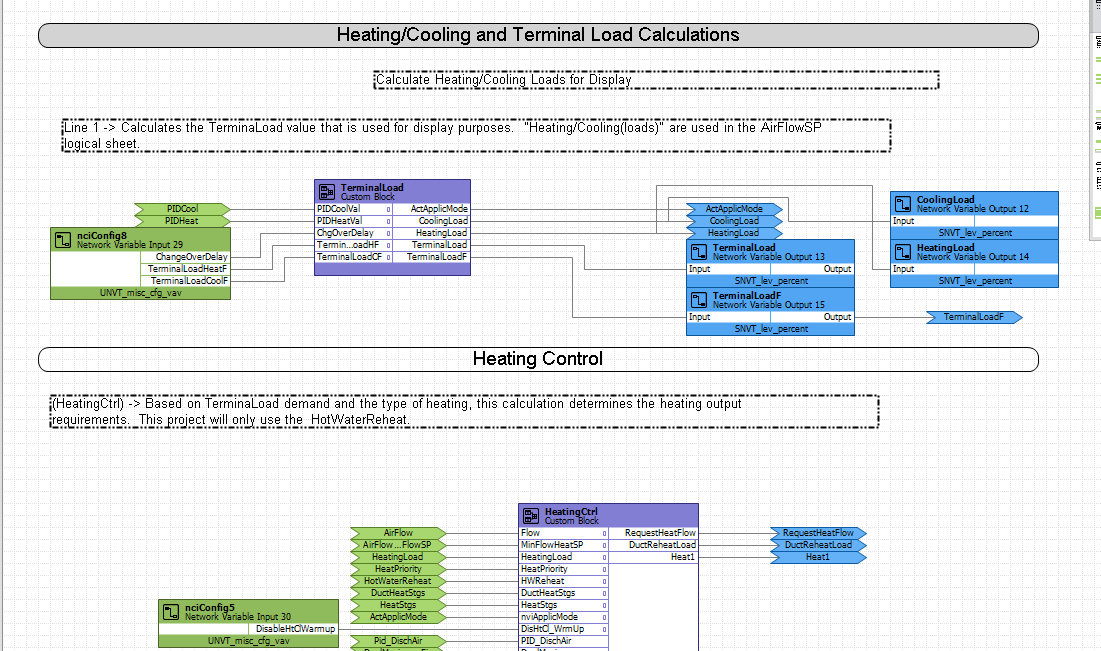

In [22]:
load = Image(filename='images/load_cntrl.PNG')
display(load)

### Load Control (Tab)
<p>The <strong>load control</strong> section is where most of the dual max logic is handled.  There are two PID loops (one each for deviation from the associated heating/cooling setpoints).  The output from the Heating PID loop is used to reset the <code>discharge air temperature setpoint</code>.  Again, please feel free to ask questions and I'll do my best to answer them and point out the applicable sections of logic.</p>

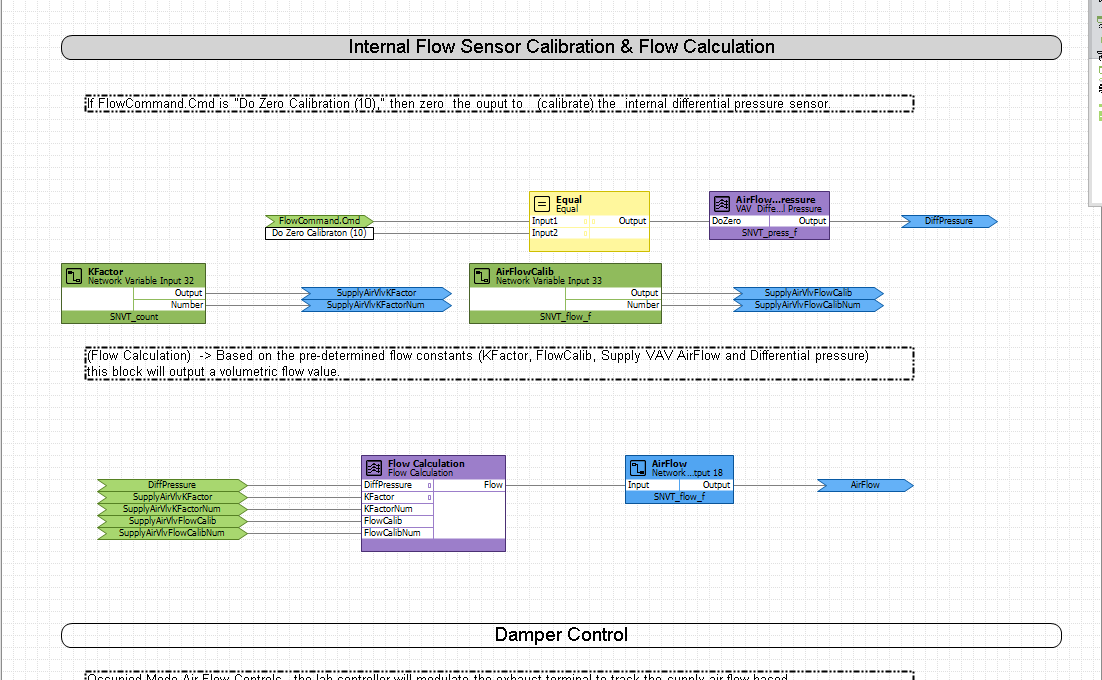

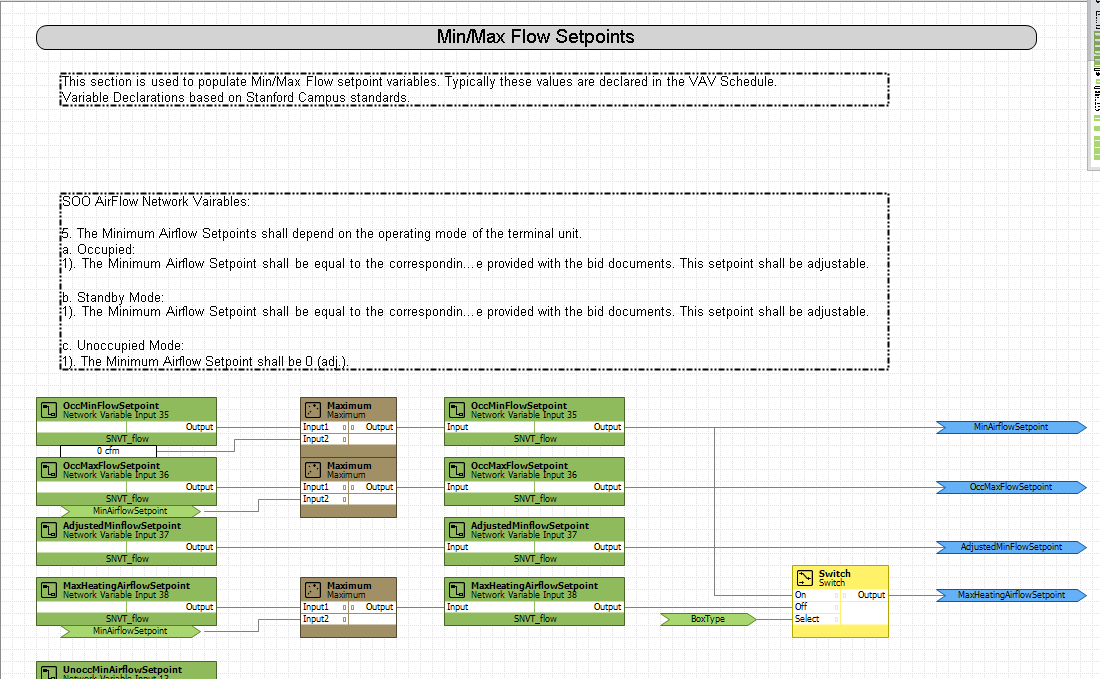

In [23]:
air = Image(filename='images/airflow.PNG')
air_sp = Image(filename='images/airflow_sp.PNG')
display(air, air_sp)

### Airflow & Airflow Setpoints (Tab)
<p>There is a fair bit of legacy code here but the basic gist is air flow setpoint determination.  The only noteworthy topic is that the dual max (tri-max) section of code is accomplished here.  During the <strong>second</strong> stage of heating the <code>air flow setpoint</code> is driven towards the <code>Heating Airflow Setpoint Max</code></p>

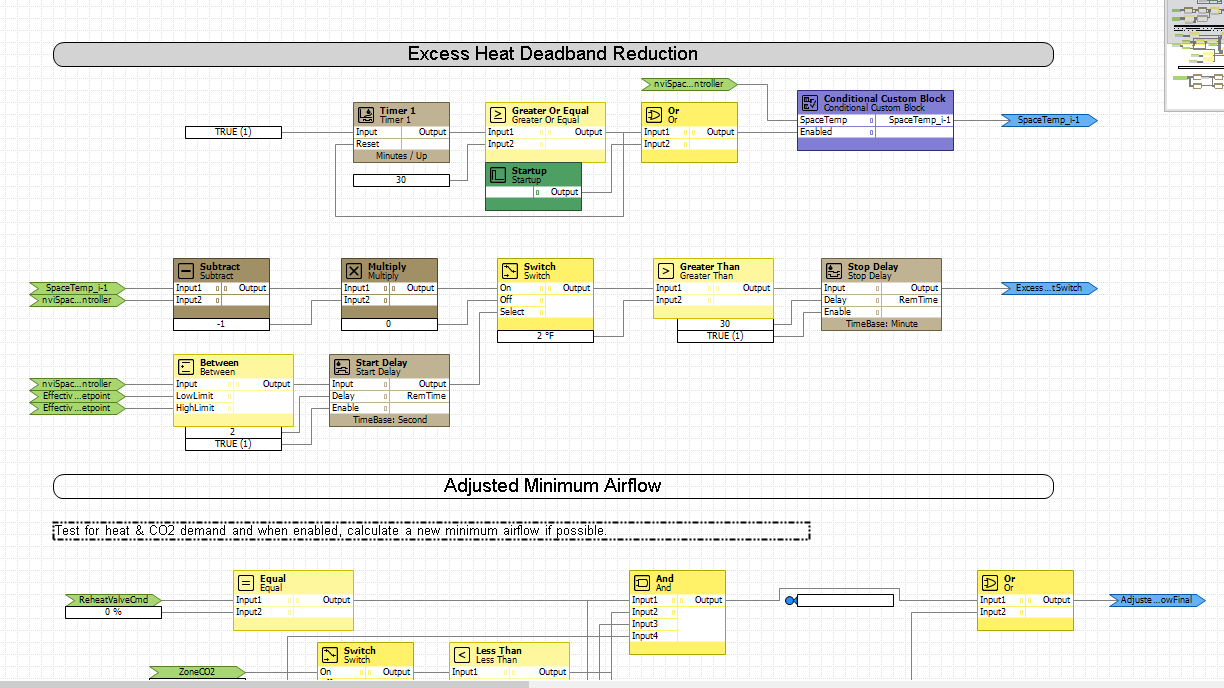

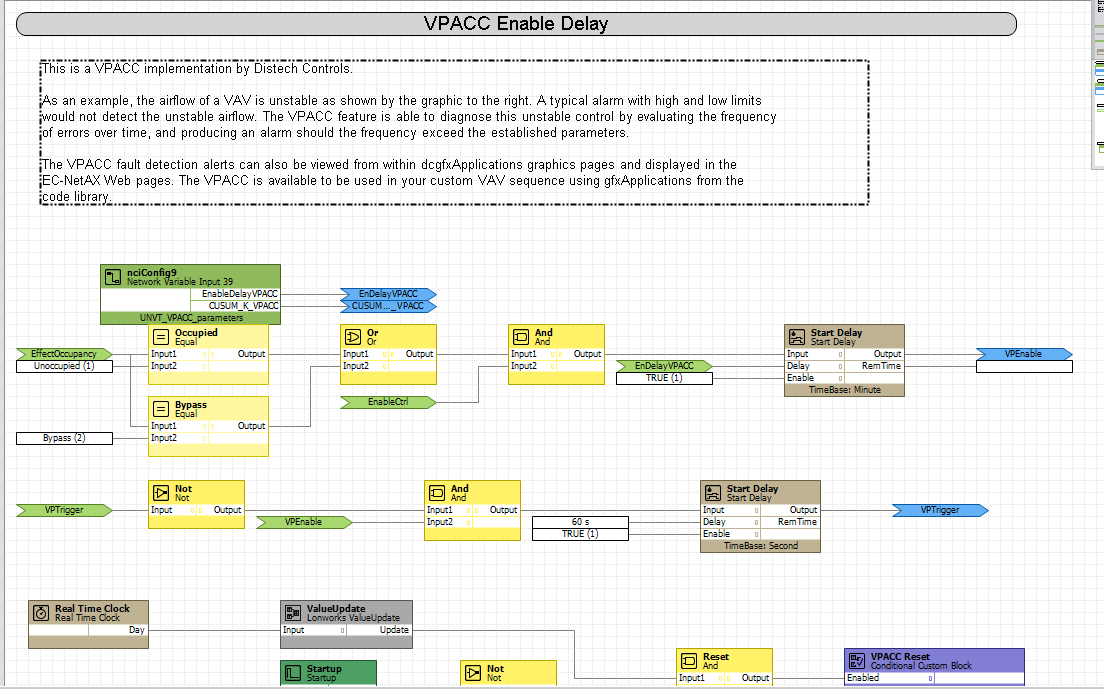

In [24]:
add = Image(filename='images/additional_programming.PNG')
vpacc = Image(filename='images/vpacc.PNG')
display(add, vpacc)

### Additional Programming & VPACC (Tab)
<p>I have no comments on VPACC.</p>
<p>In the <strong>additional programming</strong> section there is logic to account for the spectrum bindings that are used on the floor plan graphics.  The object of this is to keep as much of the redundant code that tends to hide in niagara, within the standard VAV code base.</p>

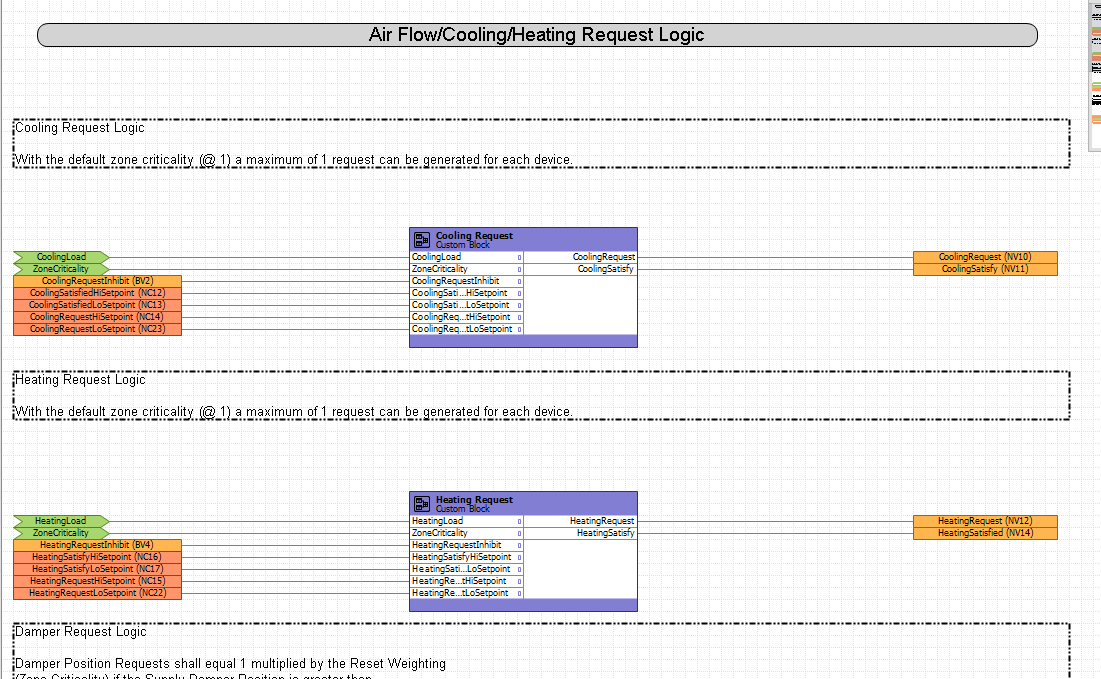

In [25]:
requests = Image(filename='images/requests.PNG')
display(requests)

### Requests(Tab)
<p>I chose to again offload the <code>request/voting</code> logic from the niagara environment and add it to the standard VAV base code.  This make it easier to implement Trim & Respond logic later down the road.  Which can be accomplished a few different ways.  One would be to <code>sum</code> the requests within niagara and apply the associated reset logic to the air-handling unit that correlates to that particular zone group.  The other (more LON/Distech centric method) would be to sum the requests via a <code>many to one</code> LON binding to the AHU controller utilizing the <strong>fan-in slot</strong> on the designated nvi.</p>

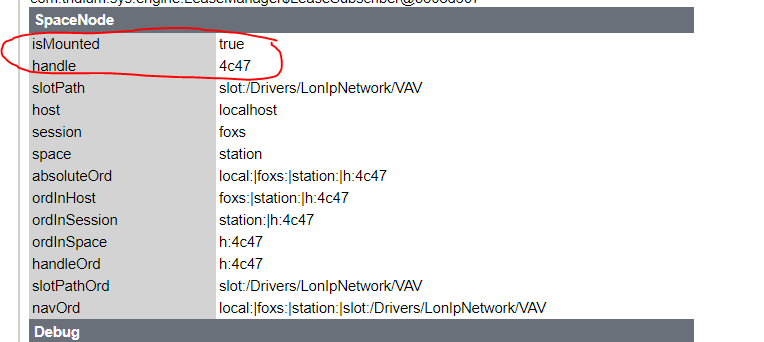

In [26]:
spy = Image(filename='images/spy_loc.PNG')
display(spy)

## Replacing an ECL Controller
<p></p>

### Spy Local
<p>The most sure way to make sure that the code you are loading is what was <strong>IN</strong> the controller is to <code>spy local</code> on the controller in question and note the SpaceNode handle.  The value displayed here correlates to the folder structure in the BCP directory in niagara.  Within that folder will be a generic Program.gfx file which should be the synced version of the code that is currently in the controller.  From here you can paste that into a local working directory and rename accordingly.</p>

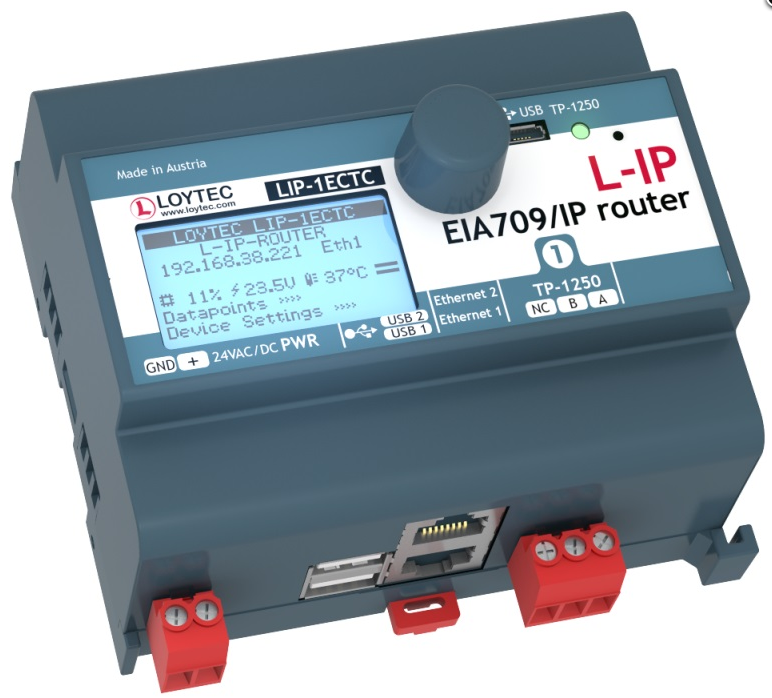

In [27]:
l_ip = Image(filename='images/l_ip.PNG')
display(l_ip)

### Programming the controller
<p>Depending on the tools at your disposal there are a few different ways to <em>pre-load</em> your ECL.  The <strong>preferred</strong> method that Therma uses is for the technician to have a working <strong>local station</strong> that has most of the programs needed and a single Lon-IP driver under the config directory.  The technician would then only need to turn on the L-IP router and connect the TP-10 trunk from the controller and push in the code.  There is large cost savings and huge benefit to using the Loytec tool-set in terms of <code>post-deployment</code> verification.  Once the code has been pushed out to the controller and the appropriate bindings (if there are any) have been made (and commission) has occurred.  It would be a good time to run the LPA (Lon Protocol Analyzer) tool and run a quick 5-10 minute packet capture on the TP-10 trunk.  Once the packet capture is complete there are several diagnostics that can be used to complete a <i>field report</i> of the current status of the health of the LON TP-10 network.</p>